In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
 
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('Churn_Modelling.csv')

In [34]:
df.shape

(10000, 14)

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
# Removing unwanted columns.
df.drop(df.iloc[:,0:3],axis=1,inplace=True)

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
le = LabelEncoder()
le.fit(df['Geography'])
df['Geography']=le.transform(df['Geography'])

In [40]:
le.fit(df['Gender'])
df['Gender']=le.transform(df['Gender'])

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [42]:
y = df['Exited']
X = df.drop('Exited',axis=1)

In [43]:
#Using resampling technique to handle imbalanced data.
from imblearn.over_sampling import SMOTE
method = SMOTE(kind='svm')

In [44]:
X, y = method.fit_resample(X, y)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [46]:
ss = StandardScaler()

x_train_ss = ss.fit_transform(X_train)

x_test_ss = ss.transform(X_test)

In [47]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(2, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])

In [48]:
model.compile(optimizer="Adam", loss="binary_crossentropy")

In [49]:
trained_model = model.fit(x_train_ss, y_train, epochs=10,batch_size=10)

Epoch 1/10
1115/1115 [==============================] - 1s 993us/step - loss: 0.6889
Epoch 2/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.6187
Epoch 3/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5795
Epoch 4/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5689
Epoch 5/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5512
Epoch 6/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5396
Epoch 7/10
1115/1115 [==============================] - 1s 995us/step - loss: 0.5334
Epoch 8/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5178
Epoch 9/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5167
Epoch 10/10
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5103


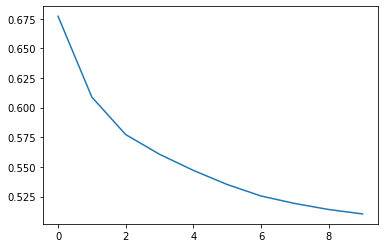

In [50]:

plt.plot(trained_model.history["loss"])

In [51]:
# Testing

In [52]:
y_pred = model.predict(x_test_ss)

In [53]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2389
           1       0.75      0.77      0.76      2389

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778

